In [ ]:
# Stažení a instalace knihoven, které budeme používat

import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

In [87]:
# Import knihoven, které budeme používat

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.linear_model import LinearRegression

# Regrese

#### Autoři:
* [Martin Vlach](mailto:xvlach@mendelu.cz)
* [Jakub Dolejší](mailto:xdolejsi@mendelu.cz)
---
### Regrese v různých vědních odvětvích
- **Lékařství** - *regrese nemoci*
- **Právo** - *regresy*
- **Filozofie** - *nekonečný regres*
- **Softwarové inženýrství** - *regresní testování*
- <span style="color:#eb4034">**Statistika** - *regresivní analýza*</span>
---
### Regresivní analýza
* Jedna z nejpoužívanějších statistických metod.
* Existuje značné množství variant, přičemž každá je vhodná na jiný typ problému.

</br>

* ***Definice*** - *Označení statistických metod, které souží k odhadu jisté náhodné veličiny na základě znalosti jedné či více jiných veličin. Cílem regresní analýzy je popsat tuto závislost pomocí vhodného modelu.*

    * ***Závislá proměnná*** - *Parametr, jehož hodnotu zkoumáme/hledáme.*
    * ***Nezávislá proměnná*** - *Parametr, jehož hodnota je nám známa. S využítím těchto hodnot je hledána hodnota závislé proměnné. Tyto hodnoty se často označují jako regresory*

#### Dělení regresivních modelů
* Diskrétní hodnoty proměnných **x** Spojité hodnoty proměnných **x** Kombinace
* Jednoduchá **x** Vícenásobná
* Lineární **x** Nelineární závislost


### Lineární regrese


In [89]:
wh_df = pd.read_csv('data/weight-height.csv')

""" 
Příklad jednoduché regresivní analýzy (pouze jeden regres)
Z tohoto důvodu budeme zkoumat pouze muže a sloupec pohlaví můžeme ignorovat.
Dále si převedeme hodnoty z datasetu na metrické jednotky, neboť jsou uvedeny v imperiálních hodnotách.
"""

# 1 palec = 2,54 cm
height_constant = 2.54

# 1 libra = 0,45359237 kg
weight_constant = 0.4535923

males_only_df = (wh_df[(wh_df['Gender'] == 'Male')]).drop('Gender',1) #
males_only_df['Height'] *= height_constant
males_only_df['Weight'] *= weight_constant
males_only_df.head()

,Height,Weight
0,187.571423,109.721058
1,174.706036,73.622781
2,188.239668,96.497614
3,182.196685,99.809570
4,177.499761,93.598681


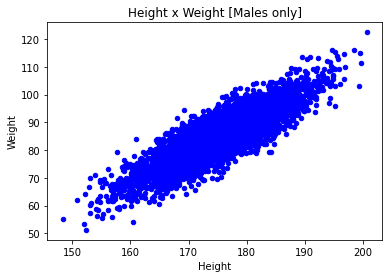

In [90]:
males_only_df.plot.scatter(x="Height", y="Weight", color='b', title='Height x Weight [Males only]');

In [91]:
"""
Ověření lineární korelační závislosti

p - Pearsonův korelační koeficient měří sílu lineární závislosti mezi dvěma veličinami.

OTÁZKA - Jakých hodnot může p nabývat?
"""
x = males_only_df['Height']
y = males_only_df['Weight']

p = stats.pearsonr(x, y)
print(f"Hodnota Pearsonova korelačního koeficientu - {p[0]}.")

Hodnota Pearsonova korelačního koeficientu - 0.8629788486163176.


In [92]:
model = LinearRegression()
model.fit(x.values.reshape((-1, 1)), y)

LinearRegression()

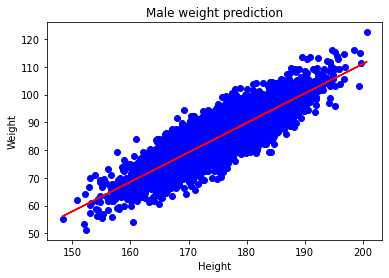

In [100]:
plt.scatter(x, y, color = "blue")
plt.plot(x, model.predict(x.values.reshape((-1, 1))), color = "red")
plt.title("Male weight prediction")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [108]:
input_height = input('Zadejte vaši výšku - ')

Zadejte vaši výšku - 180


In [107]:
weight_predict = model.predict(np.array(float(input_height)).reshape((-1, 1)))
print(weight_predict)

[90.87096784]
